In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('sales_data.csv')
df.head()

,date,product,quantity,revenue
0,2024-01-01,A,10,200
1,2024-01-02,B,5,120
2,2024-01-03,A,8,160
3,2024-01-04,B,7,140
4,2024-01-05,A,12,240


In [4]:
print(df.isnull().sum())
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
daily_sales = df.groupby('date').agg({'revenue': 'sum'}).reset_index()
daily_sales.head()

date        0
product     0
quantity    0
revenue     0
dtype: int64


,date,revenue
0,2024-01-01,200
1,2024-01-02,120
2,2024-01-03,160
3,2024-01-04,140
4,2024-01-05,240


In [5]:
daily_sales['time_index'] = np.arange(len(daily_sales))
X = daily_sales[['time_index']]
y = daily_sales['revenue']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3349.0433673469392
R2 Score: -0.10712177432956671


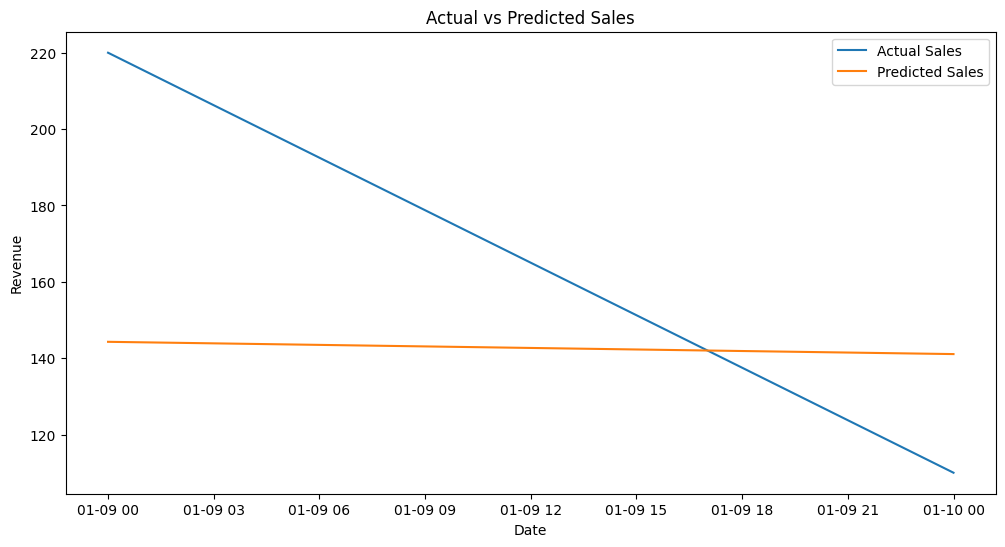

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'][-len(y_test):], y_test, label='Actual Sales')
plt.plot(daily_sales['date'][-len(y_test):], y_pred, label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [9]:
future_days = 30
last_index = daily_sales['time_index'].max()
future_index = np.arange(last_index + 1, last_index + future_days + 1).reshape(-1, 1)
future_pred = model.predict(future_index)

last_date = daily_sales['date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

forecast = pd.DataFrame({'date': future_dates, 'predicted_revenue': future_pred})
forecast


C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,date,predicted_revenue
0,2024-01-11,137.857143
1,2024-01-12,134.642857
2,2024-01-13,131.428571
3,2024-01-14,128.214286
4,2024-01-15,125.000000
5,2024-01-16,121.785714
6,2024-01-17,118.571429
7,2024-01-18,115.357143
8,2024-01-19,112.142857
9,2024-01-20,108.928571


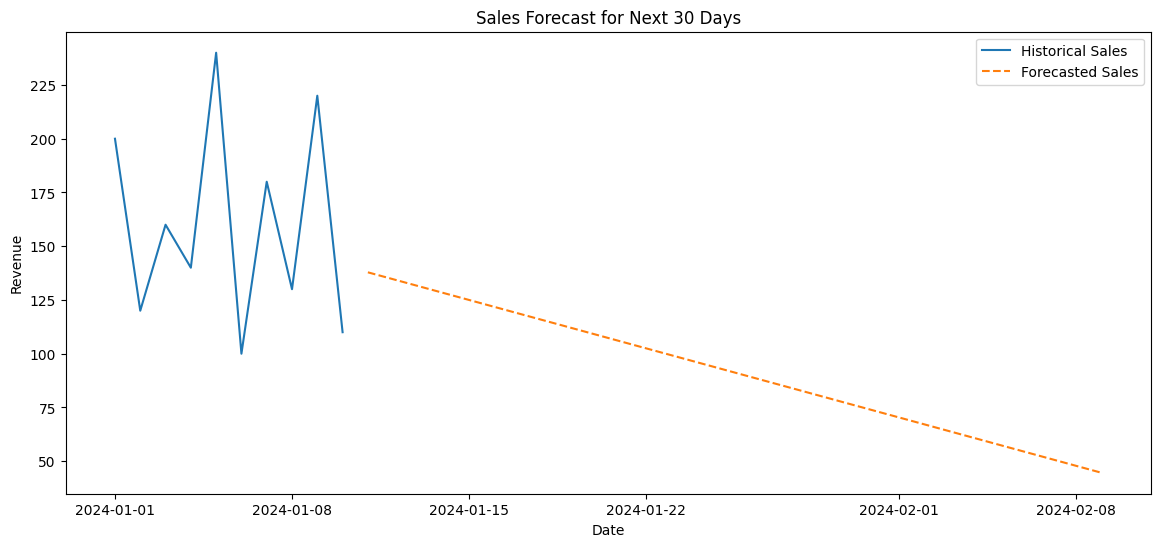

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['date'], daily_sales['revenue'], label='Historical Sales')
plt.plot(forecast['date'], forecast['predicted_revenue'], label='Forecasted Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Sales Forecast for Next 30 Days')
plt.legend()
plt.show()